In [41]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, r2_score, precision_score, recall_score, accuracy_score, f1_score, confusion_matrix

import seaborn as sns

In [42]:
data = pd.read_csv('madfhantr.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [43]:
print("Shape of data is : ", data.shape)

print(data.isna().sum())
print(data.isna().sum().sum())

Shape of data is :  (614, 13)
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
149


In [44]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [45]:
numerical_cols = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed']

In [46]:
numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

In [47]:
data[numerical_cols] = numerical_imputer.fit_transform(data[numerical_cols])
data[categorical_cols] = categorical_imputer.fit_transform(data[categorical_cols])

In [48]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [49]:
X = data.drop(['Loan_ID', 'Loan_Status'], axis=1)
Y = data['Loan_Status']

In [50]:
X = pd.get_dummies(X)

In [51]:
labelEncoder = LabelEncoder()

Y_encoded = labelEncoder.fit_transform(Y)

In [52]:
x_train, x_test, y_train, y_test = train_test_split(X, Y_encoded, test_size=0.3, random_state=42)

In [53]:
clf = DecisionTreeClassifier(random_state=42)

In [54]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [55]:
y_pred = clf.predict(x_test)

In [56]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

In [57]:
print(f'Accuracy is : {accuracy}')
print(f'Precision is : {precision}')
print(f'Recall score is : {recall}')
print(f'F1 score is : {f1score}')

Accuracy is : 0.6810810810810811
Precision is : 0.732824427480916
Recall score is : 0.8
F1 score is : 0.7649402390438247


In [58]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix is : ')
print(conf_matrix)

Confusion matrix is : 
[[30 35]
 [24 96]]


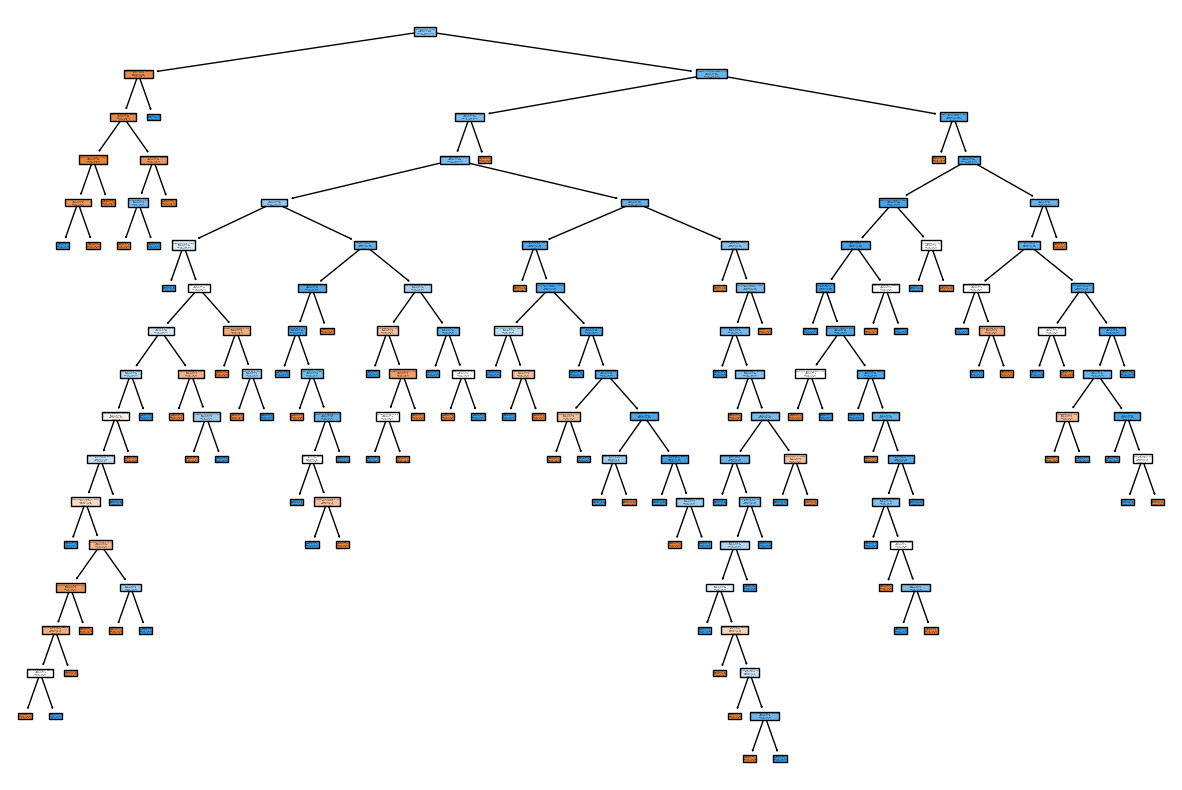

In [60]:
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=labelEncoder.classes_)
plt.show()

Text(50.72222222222221, 0.5, 'Prediction')

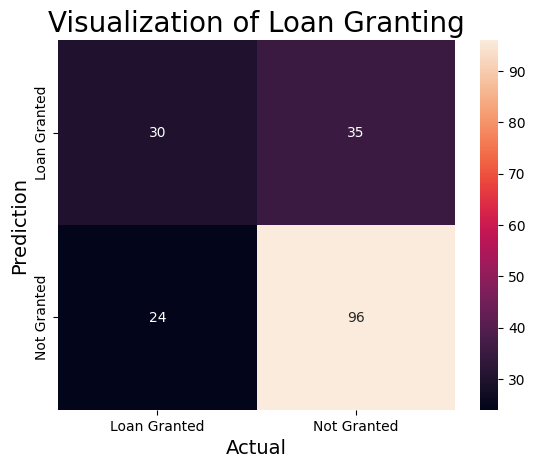

In [63]:
sns.heatmap(conf_matrix,
            annot=True,
            fmt='g',
            xticklabels=['Loan Granted', 'Not Granted'],
            yticklabels=['Loan Granted', 'Not Granted'])

plt.title('Visualization of Loan Granting', fontsize=20)
plt.xlabel("Actual", fontsize = 14)
plt.ylabel("Prediction", fontsize= 14)